In [169]:
!pip install open3d

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 420.5/420.5 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.3/138.3 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 39.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 65.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.4 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.4
    Uninstalling widgetsnbextension-3.6.4:
      Successfully uninstalled widgetsnbextension-3.6.4
  Attempting uninstall: werkzeug
    Found existing installa

In [183]:
im1 = "/content/drive/MyDrive/6 DoF Pose Estimation/cereal_box_1/segments/cereal_box_1_1_1_seg1.pcd"
im2="/content/drive/MyDrive/6 DoF Pose Estimation/cereal_box_1/full/cereal_box_1_1_2.pcd"
im3 = "/content/drive/MyDrive/6 DoF Pose Estimation/cereal_box_1/full/cereal_box_1_1_3.pcd"
im4 = "/content/drive/MyDrive/6 DoF Pose Estimation/cereal_box_1/full/cereal_box_1_1_4.pcd"
im5 = "/content/drive/MyDrive/6 DoF Pose Estimation/cereal_box_1/full/cereal_box_1_1_5.pcd"


In [184]:
pcd1=o3d.io.read_point_cloud(im1)
#pcd2=o3d.io.read_point_cloud(im2)
#pcd3=o3d.io.read_point_cloud(im3)
#pcd4=o3d.io.read_point_cloud(im4)
#pcd5=o3d.io.read_point_cloud(im5)



**Load the Requirements**

In [11]:
from google.colab import drive
drive.mount('/content/drive')
from google.colab.patches import cv2_imshow

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import Packages Neccessary to load the dataset**

In [3]:
import cv2
import numpy as np
import glob
import os

**Load The Dataset**

In [4]:
dataset_path = '/content/drive/MyDrive/6 DoF Pose Estimation'
dataset_path_cereal_box_1 = 'uncc-dataset/cereal_box_1/'

**Load the Full Images**

In [13]:
segmented  =[]
def load_images(directory):
    num_poses, num_views_per_pose = 6,5
    images = np.empty((num_poses, num_views_per_pose), dtype=object)

    image_files = glob.glob(os.path.join(directory, '*.png'))
    for image_file in image_files:
        file_name = os.path.basename(image_file)
        item_name = file_name.split('.')
        if 'separated' in item_name[0]:
            object_name,_,_, pose_idx, view_idx,_ = item_name[0].split('_')
        else:
            object_name,_,_, pose_idx, view_idx = item_name[0].split('_')
        
        pose_idx = int(pose_idx)-1
        view_idx = int(view_idx)-1
        image = cv2.imread(image_file, 0)
        images[pose_idx][view_idx] = image

    return images

**Load the segment images**

In [186]:
def load_segmented(directory):
    segmented = []
    image_files = glob.glob(os.path.join(directory, '*.png'))
    for image_file in image_files:
        file_name = os.path.basename(image_file)
        item_name = file_name.split('.')
        object_name,_,_, pose_idx, view_idx,segment= item_name[0].split('_')
        dict = {}
        dict['object_name'] = object_name
        dict['pose_idx'] = pose_idx
        dict['view_idx'] = view_idx
        dict['segment_name'] = segment
        dict['image'] =  cv2.imread(image_file, 0)

        segmented.append(dict)
        image = cv2.imread(image_file, 0)
  
    return segmented
segmented_cb1 = load_segmented('/content/drive/MyDrive/6 DoF Pose Estimation/cereal_box_1/segments')
segmented_cb2 = load_segmented('/content/drive/MyDrive/6 DoF Pose Estimation/cereal_box_2/segments')

segmented_cc1=load_segmented('/content/drive/MyDrive/6 DoF Pose Estimation/coffee_can_2/segments')

segmented_cookies=load_segmented('/content/drive/MyDrive/6 DoF Pose Estimation/cookie_box_1/segments')

segmented_jc1=load_segmented('/content/drive/MyDrive/6 DoF Pose Estimation/juice_container_1/segments')
segmented_jc2=load_segmented('/content/drive/MyDrive/6 DoF Pose Estimation/juice_container_2/segments')

segmented_mb1=load_segmented('/content/drive/MyDrive/6 DoF Pose Estimation/milk_box_1/segments')
segmented_mb2=load_segmented('/content/drive/MyDrive/6 DoF Pose Estimation/milk_box_2/segments')










**Load PCD File**

In [190]:
import os
import open3d as o3d

def load_segmented(directory):
    segmented = []
    pcd_files = glob.glob(os.path.join(directory, '*.pcd'))
    for pcd_file in pcd_files:
        file_name = os.path.basename(pcd_file)
        item_name = file_name.split('.')
        object_name,_,_, pose_idx, view_idx,segment= item_name[0].split('_')
        dict = {}
        dict['object_name'] = object_name
        dict['pose_idx'] = pose_idx
        dict['view_idx'] = view_idx
        dict['segment_name'] = segment
        dict['point_cloud'] =  o3d.io.read_point_cloud(pcd_file)

        segmented.append(dict)
  
    return segmented

segmented_cb1 = load_segmented('/content/drive/MyDrive/6 DoF Pose Estimation/cereal_box_1/segments')
segmented_cb2 = load_segmented('/content/drive/MyDrive/6 DoF Pose Estimation/cereal_box_2/segments')

segmented_cc1=load_segmented('/content/drive/MyDrive/6 DoF Pose Estimation/coffee_can_2/segments')

segmented_cookies=load_segmented('/content/drive/MyDrive/6 DoF Pose Estimation/cookie_box_1/segments')

segmented_jc1=load_segmented('/content/drive/MyDrive/6 DoF Pose Estimation/juice_container_1/segments')
segmented_jc2=load_segmented('/content/drive/MyDrive/6 DoF Pose Estimation/juice_container_2/segments')

segmented_mb1=load_segmented('/content/drive/MyDrive/6 DoF Pose Estimation/milk_box_1/segments')
segmented_mb2=load_segmented('/content/drive/MyDrive/6 DoF Pose Estimation/milk_box_2/segments')


**Displaying a Sample Image**

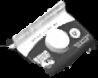

In [154]:
cv2_imshow(segmented_mb2[7]['image'])

**Import Necessary Packages to Extract Keypoints and SVM**

In [15]:
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

**SIFT Descriptors**

In [191]:
def point_cloud_descriptor(pcd):
    voxel_down_pcd = pcd.voxel_down_sample(voxel_size=0.01)

    # Compute the normals of the voxel grid
    voxel_down_pcd.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.1, max_nn=30))

    # Detect keypoints using ISSKeypoint3D
    keypoints = o3d.geometry.keypoint.compute_iss_keypoints(voxel_down_pcd,
                                                            salient_radius=0.01,
                                                            non_max_radius=0.01,
                                                            gamma_21=0.8,
                                                            gamma_32=0.8)

    # Visualize the original point cloud and the detected keypoints
    o3d.visualization.draw_plotly([pcd1, keypoints])
    # Convert keypoints to NumPy arrays
    descriptors= np.asarray(keypoints.points)

    return descriptors



In [192]:
point_cloud_descriptor(pcd1)

array([], shape=(0, 3), dtype=float64)

In [16]:
def extract_sift_descriptors(image):
    descriptors = []
    sift = cv2.xfeatures2d.SIFT_create()
    _, desc = sift.detectAndCompute(image, None)
    descriptors.extend(desc)
    return np.array(descriptors)

**Perform K Means**

In [17]:
def perform_kmeans_clustering(descriptors, k):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(descriptors)
    return kmeans

**Create Histogram**

In [18]:
def create_histogram(descriptors, kmeans):
    histogram = np.zeros(kmeans.n_clusters)
    labels = kmeans.predict(descriptors)
    for label in labels:
        histogram[label] += 1
    return histogram

In [30]:
def object_images(segmented):
    object_images = []
    for i in range(0, len(segmented)):
      object_images.append(segmented[i]['image'])
    return(object_images)


In [195]:
def object_images(segmented):
    object_images = []
    for i in range(0, len(segmented)):
      object_images.append(segmented[i]['pcd'])
    return(object_images)


In [155]:
obj=object_images(segmented_cb1)
obj2=object_images(segmented_cb2)
obj3=object_images(segmented_cc1)
obj4=object_images(segmented_cookies)
obj5=object_images(segmented_jc1)
#obj6=object_images(segmented_jc2)
obj7=object_images(segmented_mb1)
obj8=object_images(segmented_mb2)






**Preparing the X Variable**

In [200]:
def x_variable(obj):
    sift_descriptors = []
    for image in obj:
        # gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        descriptors = extract_sift_descriptors(image)
        #descriptors = point_cloud_descriptor(image)

        sift_descriptors.extend(descriptors)
    sift_descriptors = np.array(sift_descriptors)
    # Kmeans Algorithm
    k = 512  # Number of clusters
    kmeans = perform_kmeans_clustering(sift_descriptors, k)

    #Create a histogram of codeword occurrences for each object image
    histograms = []
    for image in obj:
        # gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        descriptors = extract_sift_descriptors(image)
        histogram = create_histogram(descriptors, kmeans)
        histograms.append(histogram)

    #Visualize the Histogram
    plt.figure(figsize=(100,60))
    for i, histogram in enumerate(histograms):
        plt.subplot(48, 3, i+1)
        plt.bar(range(k), histogram)
        plt.xlabel('Codeword')
        plt.ylabel('Frequency')
        plt.title(f'Object Image {i+1}')

    plt.tight_layout()
    plt.show()

    return histograms


In [ ]:
x_var=x_variable(obj)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


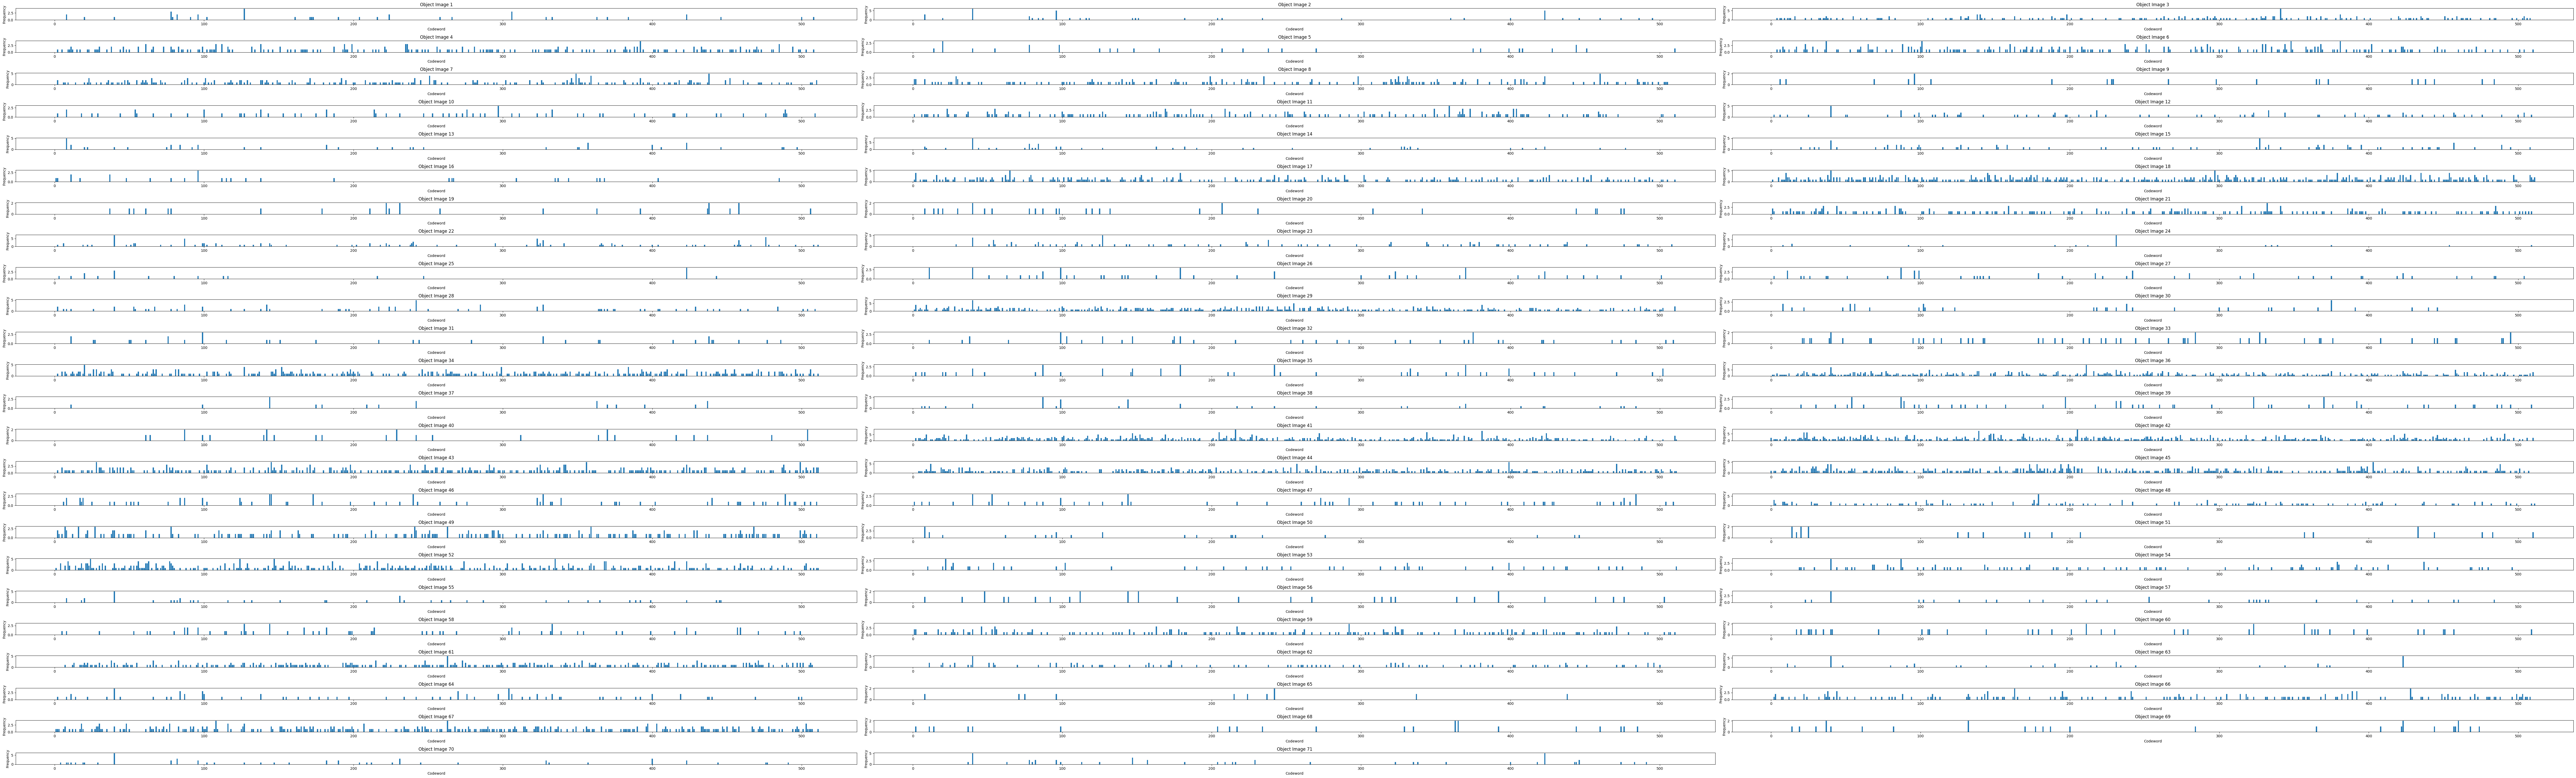

In [104]:
x_var2=x_variable(obj2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


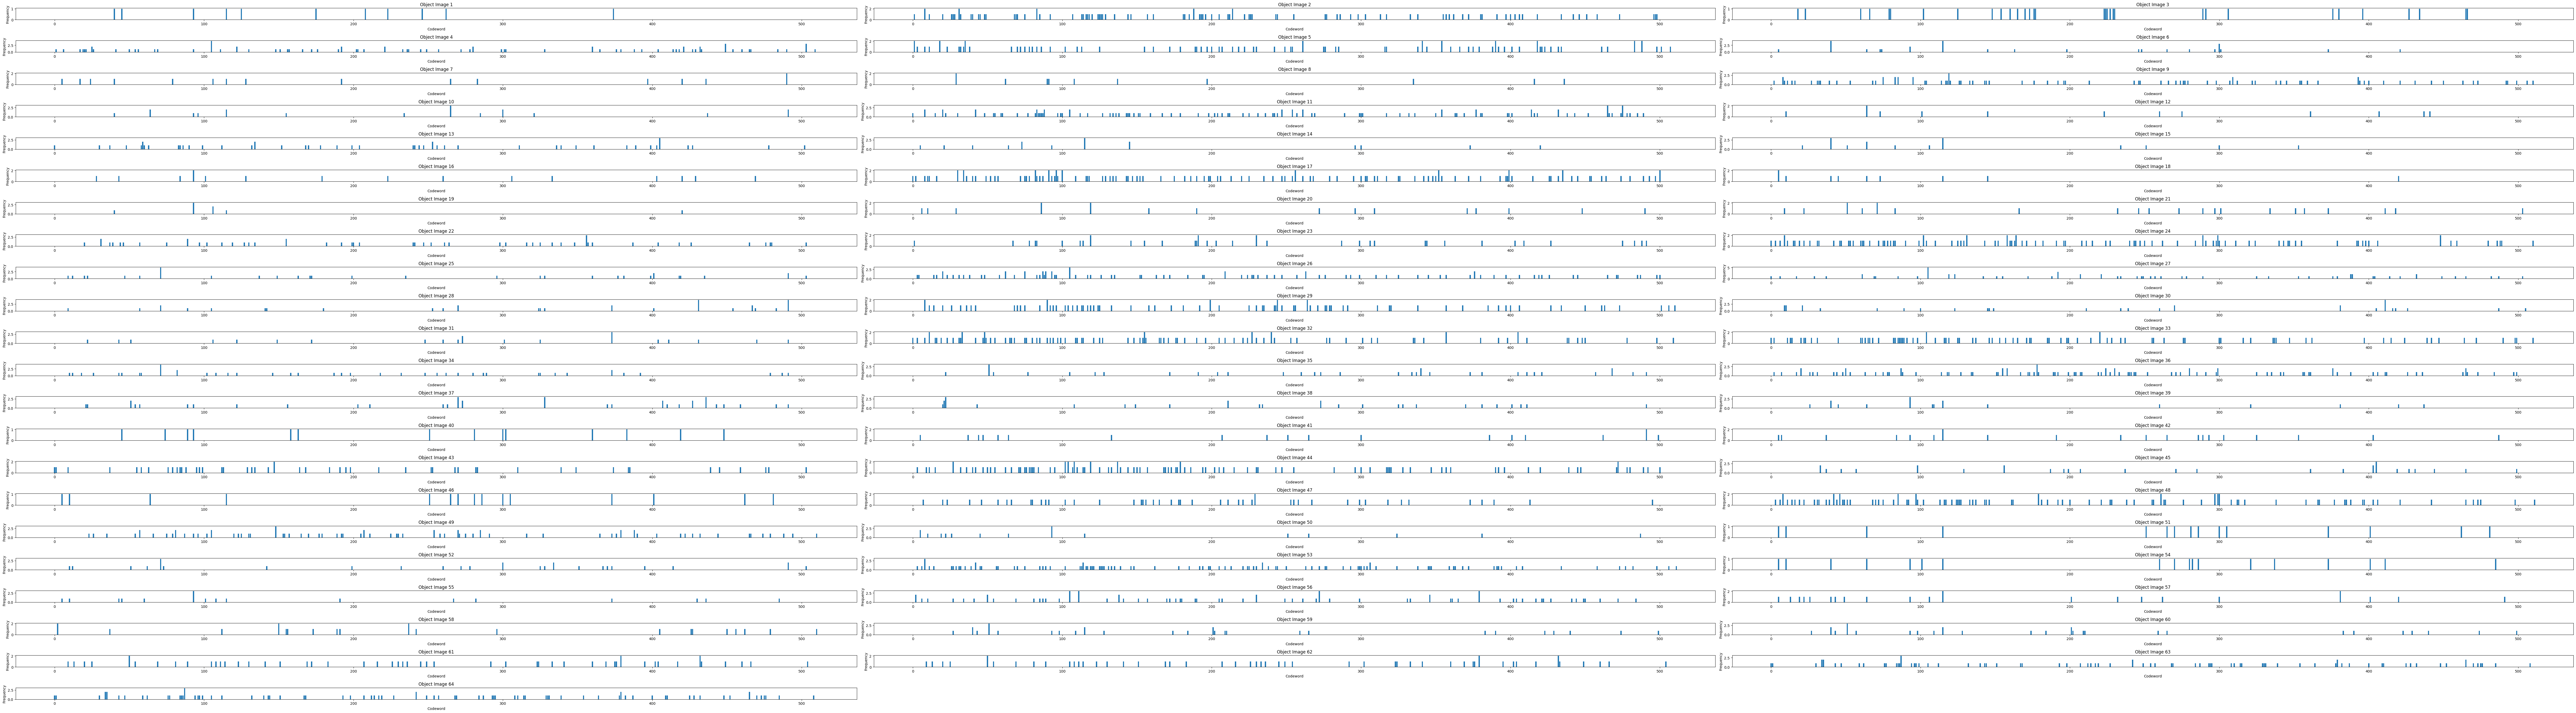

In [109]:
x_var3=x_variable(obj3)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


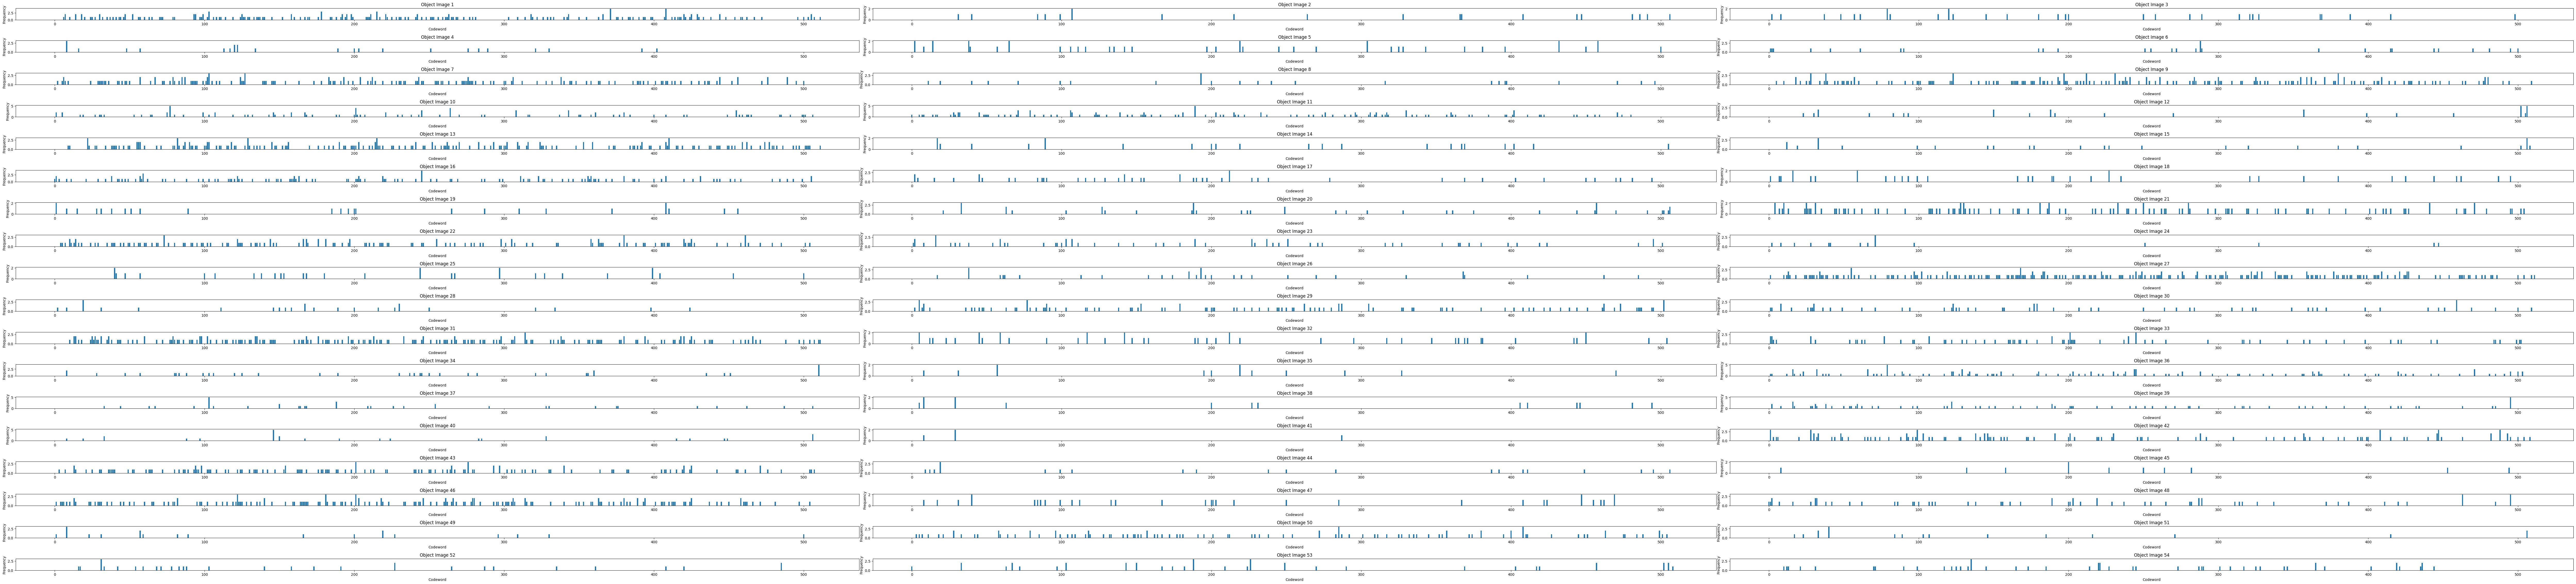

In [125]:
x_var4=x_variable(obj4)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


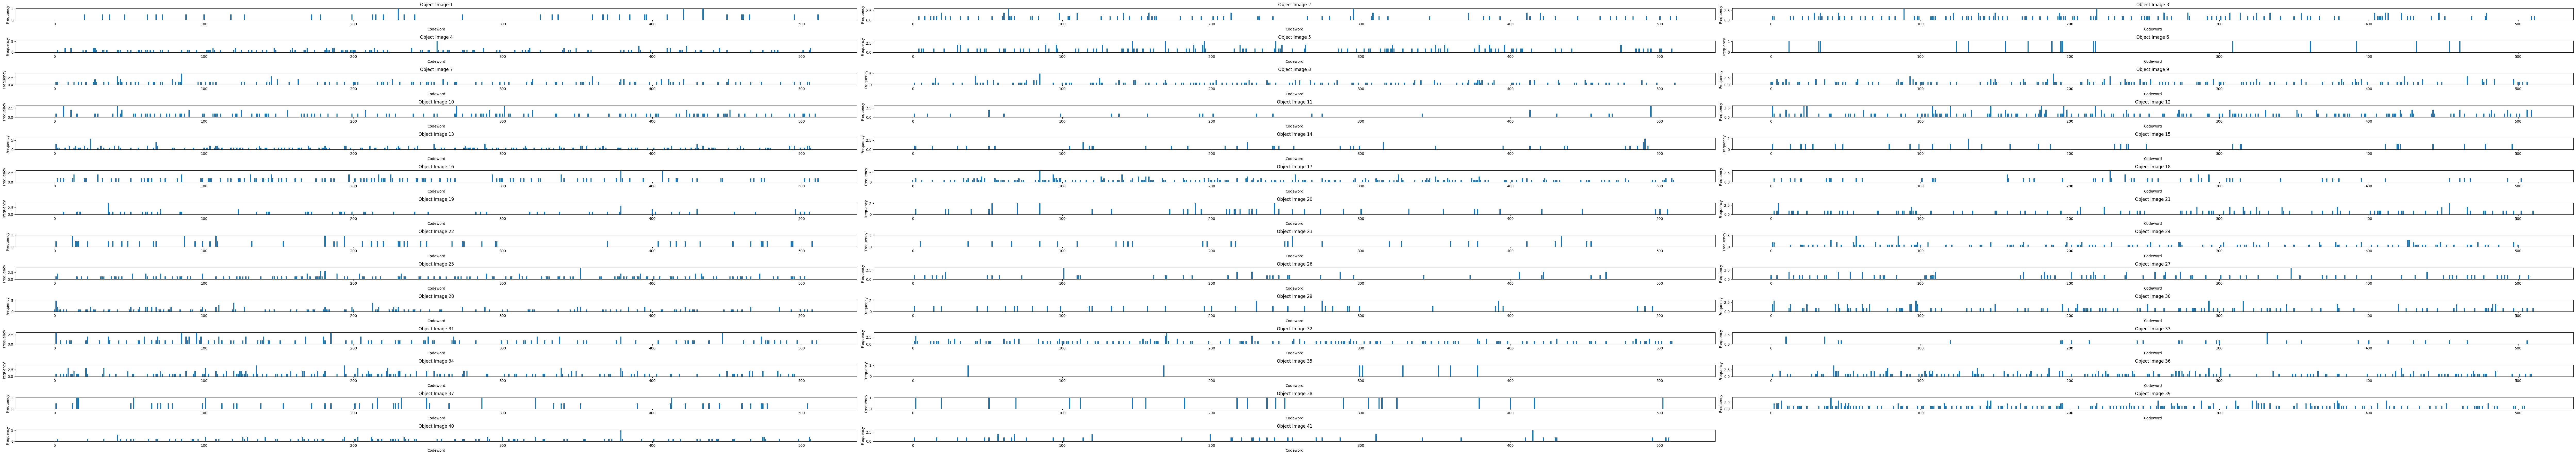

In [136]:
x_var5=x_variable(obj5)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


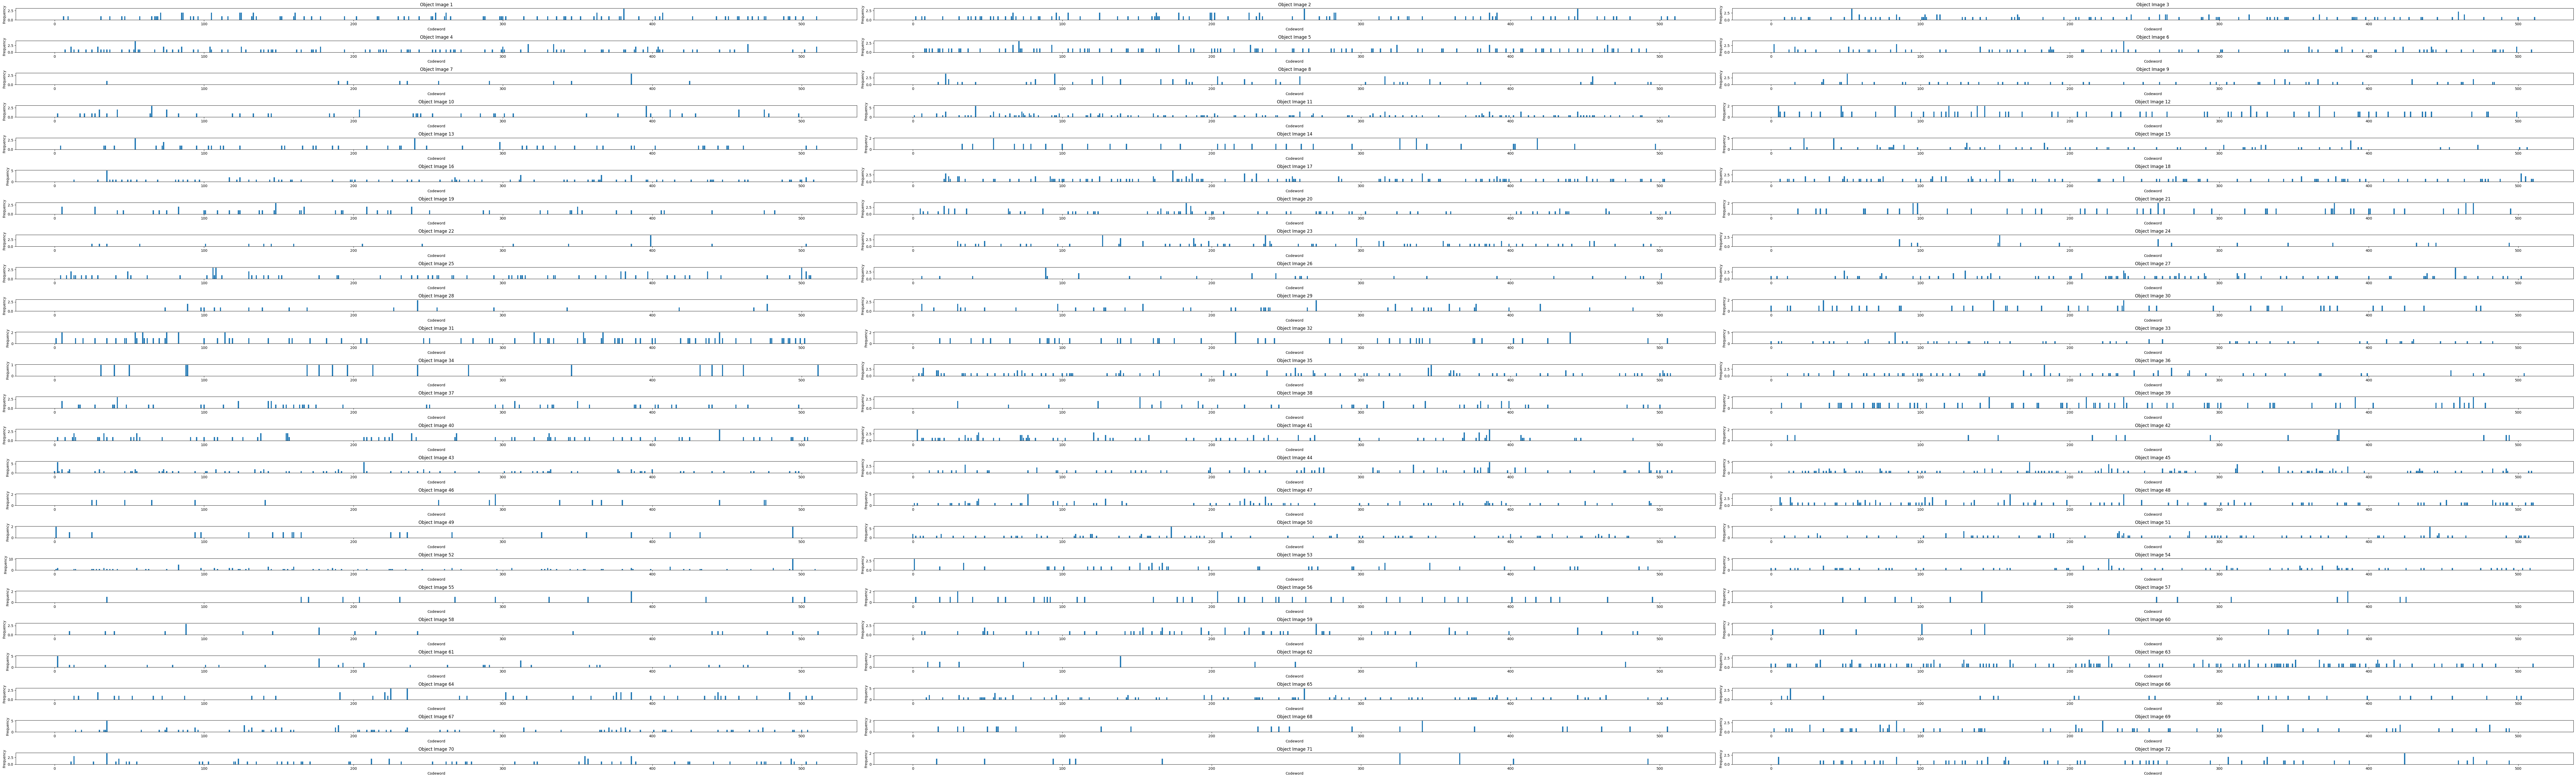

In [147]:
x_var7=x_variable(obj7)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


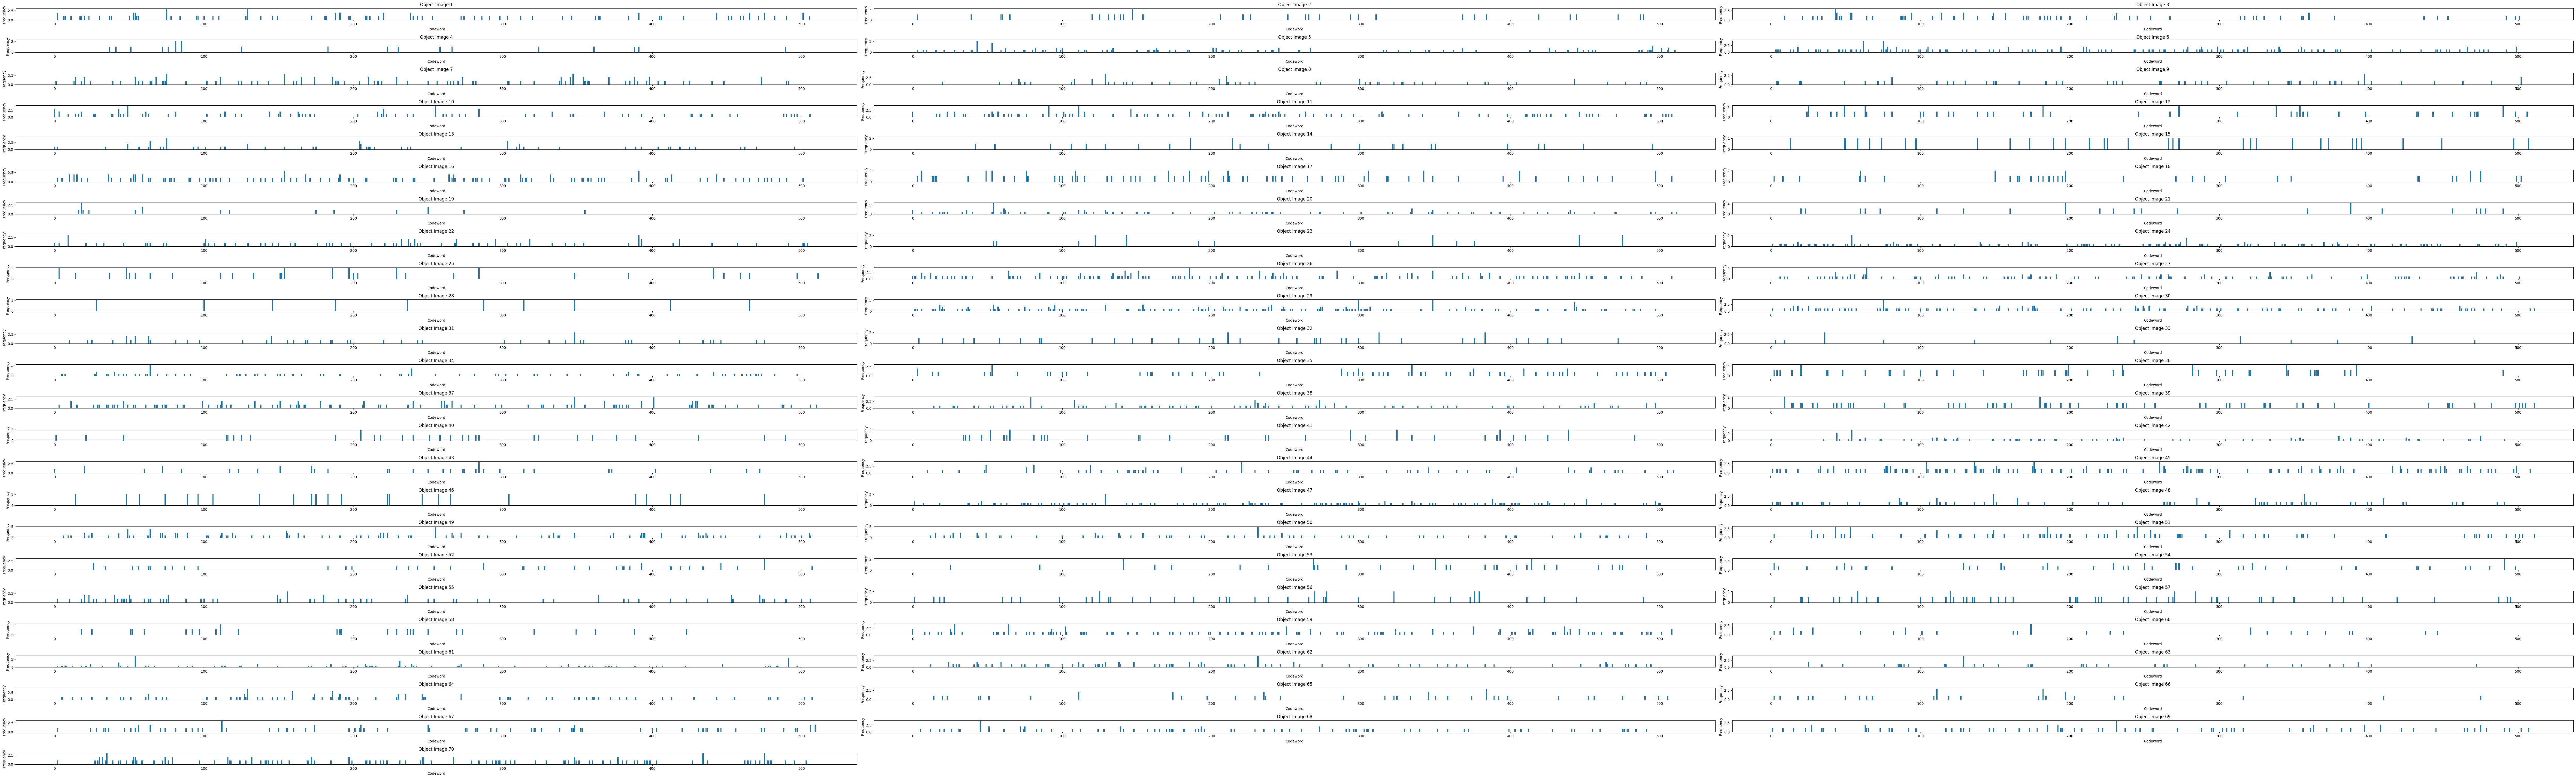

In [156]:
x_var8=x_variable(obj8)


**X Variable**

In [126]:
input = []
def append_to_input(hist_array):
  for i in range(0, len(hist_array)):
    input.append(hist_array[i])

In [157]:
append_to_input(x_var)
append_to_input(x_var2)
append_to_input(x_var3)
append_to_input(x_var4)
append_to_input(x_var5)
append_to_input(x_var7)
append_to_input(x_var8)








In [158]:
len(input)

1381

**Defining Input Variables**

In [159]:
x=input
target=[]
for i in range(0,72):
  a="cereal_box"
  target.append(a)
for i in range(72,144):
  b="Cereal_Box2"
  target.append(b)
for i in range(144,207):
  c="Coffee_Can1"
  target.append(c)
for i in range(207,261):
  d="Cookie_Box"
  target.append(d)
for i in range(261,563):
  e="Juice_container1"
  target.append(e)
for i in range(563,937):
  f="Milk_Box1"
  target.append(f)
for i in range(937,1381):
  g="Milk_Box2"
  target.append(g)
y = target  

**Training an SVM using Radial Basis Kernel**

Accuracy: 19.03614457831325


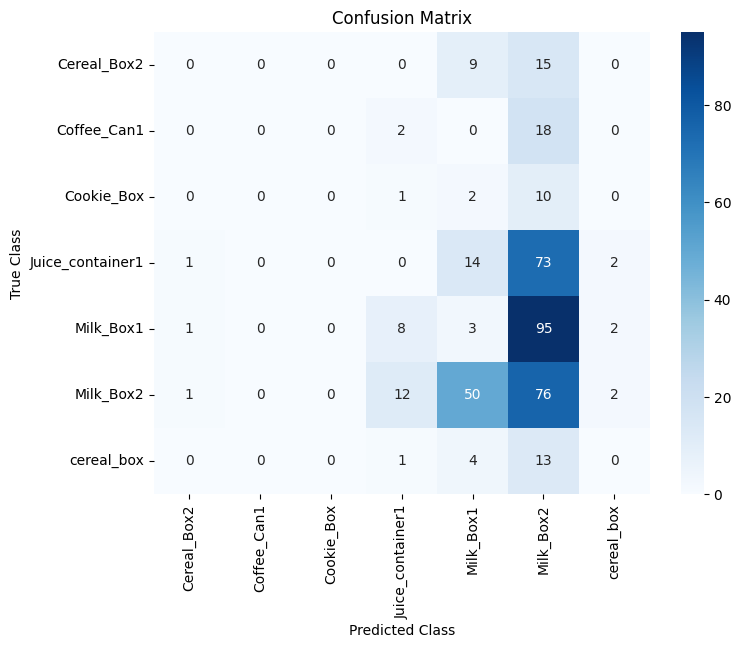

In [164]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=23)

# Train the SVM model
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)

# Predict the classes of the test samples
predicted_classes = svm.predict(X_test)


accuracy = accuracy_score(y_test, predicted_classes)
print("Accuracy:", 100*accuracy)

# Visualize the confusion matrix
labels = np.unique(y)
cm = confusion_matrix(y_test, predicted_classes, labels=labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")
plt.show()


**Training SVM using K Fold Cross Validation**

Accuracy scores: [0.1010101  0.08080808 0.10152284 0.13705584 0.0964467  0.11167513
 0.3248731 ]
Average accuracy: 0.1361988265541565
Accuracy: 32.15061549601737


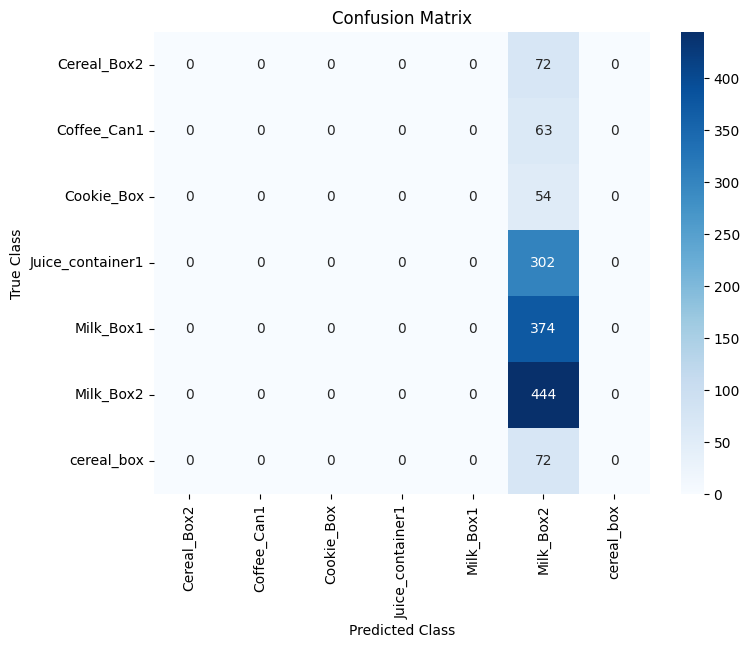

In [166]:
from sklearn.model_selection import cross_val_score

# Create the SVM model
svm = SVC(kernel='rbf')

# Perform cross-validation
scores = cross_val_score(svm, x, y, cv=7)  

print("Accuracy scores:", scores)


average_accuracy = np.mean(scores)
print("Average accuracy:", average_accuracy)


svm.fit(x, y)

# Predict the classes of the data
predicted_classes = svm.predict(x)


accuracy = accuracy_score(y, predicted_classes)
print("Accuracy:",100* accuracy)


labels = np.unique(y)
cm = confusion_matrix(y, predicted_classes, labels=labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")
plt.show()